Author: Richard Kha

Email: kharichard@csu.fullerton.edu

CPSC 483 - 01

Project 2 - Numpy Training and Validation

In this project, we are using Numpy and Matplotlib to manipulate the data from a boston house-price dataset file boston.npz. The data is separated in two arrays, features and targets, containing variables in which weights and average losses are calculated for each variable. The data is separated into a validation set, the first 20% of the data, and a training set which is the rest of the data. Using the calculated weight of all the feature array variables, we find how each feature variable changes the target variable, the median value of a home. In other experiments, we create a scatter plot of the RM and MEDV variables from training data and create a line representing the least squares fit for the plot.

Each cell has a short description at the top describing what it does.

Some code reused from Jupyter notebook here: https://github.com/sdrogers/fcmlcode/blob/master/notebooks/chapter1/linear_regression_vectors_and_matrices.ipynb

Experiment Answers Section

3. Yes, the equation appears to be linear with some outliers in the data.

4. The equation for MEDV as a linear function of RM is f(x)= -34.1273 + 9.0359.

5. The model does appear to fit the training set data well as it has a linear relationship similar to the data.

7. The training set MSE is about 41.0565 while the validation set MSE is about 53.7679, which is a difference of 12.7114 between the two errors. This may be caused because the data in the validation may contain more outliers that affect the data more as it is only 20% of all the data. The training set has more data to work with making it more accurate and reducing the average loss compared to the real data.

8. The MSE of the training set for all input features is about 21.8072 while the MSE for the validation set is about 22.8637, making the difference of error about 1.0535 between the two sets. The MSE using all of the data in the input features is much less compared to just using the RM variable with the difference between the training and validation sets MSE also less. The difference may be due to having much more data used to calculate the weights with each of the variables also affecting the weight, reducing the loss.

10. Based on changes in the value of a home, the most important features in my opinion are CHAS, NOX, RM, DIS, RAD, PTRATIO, and LSTAT as they can either save or cost you multiple hundreds to thousands of dollars. It mostly depends on budget and quality of living you want, such as a place with high NOX is cheaper but more dangerous to live in.

In [22]:
#This section loads in the boston.npz data and creates validation and training sets from the data.
#Validation sets are the first 102 items while the training sets are the rest of the 404

import numpy as np

#Load the data, separated by feature and target values
data = np.load('boston.npz')
features = data['features']
target = data['target'][:,None]


#Split into training and validation sets for feature data
temp_features = np.split(features, [102])
f_validation = temp_features[0]
f_training = temp_features[1]

#Split into training and validation sets for target data
temp_target = np.split(target, [102])
t_validation = temp_target[0]
t_training = temp_target[1]

data.close()

In [23]:
#This section finds the weight and loss for the training and validation set for the room variable

#Training Set
#Create a list of all the room values in the training set
rooms = []
for i in range(0, len(f_training)):
    temp = f_training[i][5]
    rooms.append(temp)
    
#Reshape the RMs and MEDV values so they can stack
room_array = np.array(rooms)
room_array.shape = (404,1)
ones = np.ones_like(room_array)
ones.shape = (404,1)

#Apply equation to compute w for training set
X = np.hstack((ones,room_array))
t = t_training
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)

#Print w and formatting
print ('The w0 and w1 values in order.')
print (w)
print ('---------------------------')

#print (w.shape)

#Set the w0 and w1 values
w0 = w[0]
w1 = w[1]

#Calculate the predicted values using w0 and w1 for the training set
prediction = w0 + w1 * room_array
#print (prediction)

#Set n to length of training set
n = len(prediction)

#Calculate the average loss using the average loss equation
loss = (1/n) * sum(((t - prediction)**2))


#Formatting output
print ('The loss for the training set.','\n',loss)
print ('---------------------------')



#Validation set
#--------------------------------------------------------------------------

#Create a list of all the rooms in the validation set
rooms = []
for i in range(0, len(f_validation)):
    temp = f_validation[i][5]
    rooms.append(temp)
    
    
#Reshape the RMs and MEDV values so they can stack
room_array = np.array(rooms)
room_array.shape = (102,1)

#Calculate the predicted values for validation set, using previous w values from training set
prediction = w0 + w1 * room_array
#print (prediction)

#Set n the length of validation set
n = len(prediction)

#Calculate average loss of validation set
loss = (1/n) * sum(((t_validation - prediction)**2))

#Formatting
print ('The loss for the validation set.','\n',loss)

The w0 and w1 values in order.
[[-34.12731481]
 [  9.03591206]]
---------------------------
(2, 1)
The loss for the training set. 
 [41.05654883]
---------------------------
The loss for the validation set. 
 [53.76787796]


Text(0, 0.5, 'Median Value in 1000s')

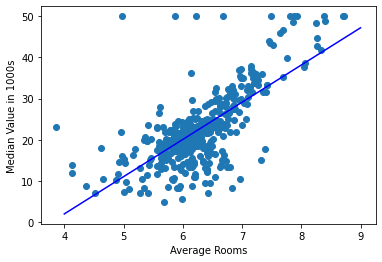

In [24]:
#This section creates a scatterplot of the RM and MEDV variable and adds a line if the least sqaures fit.

import matplotlib.pyplot as plt

data_x = []
data_y = []

#Input RM and MEDV values into a list for the scatter plot
for i in range(0, len(f_training)):
    x = f_training[i][5]
    y = t_training[i]
    data_x.append(x)
    data_y.append(y)
    
#Create the least squares fit line for the graph
testx = np.linspace(4, 9, 10)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)
    
#Create scatter plot and labels
plt.scatter(data_x,data_y)
plt.plot(testx,testt, 'b')
plt.xlabel('Average Rooms')
plt.ylabel('Median Value in 1000s')

In [25]:
#This section finds the weights and losses for each individual feature

#Training Set
#Create lists for all features in the training set
t_feature_list = [[] for i in range(0,13)]

#List of w values
w_list = []

#Output formatting
print ("These are the losses for the training set for each feature.")



#Loop for number of feature variables
# This code block finds the w values and loss values for each of the individual variables from the features array
# for the training set.

for i in range(0,13):
    for x in range(0, len(f_training)):
        temp = f_training[x][i]
        t_feature_list[i].append(temp)
        
    #Reshape the feature values so they can stack
    feature_array = np.array(t_feature_list[i])
    feature_array.shape = (404,1)
    ones = np.ones_like(feature_array)
    ones.shape = (404,1)
    
    #print (feature_array)
    #print (ones)

    #Calculate the w value using the equation
    X = np.hstack((ones,feature_array))
    t = t_training
    XX = np.dot(X.T,X)
    invXX = np.linalg.inv(XX)
    Xt = np.dot(X.T,t)
    w = np.dot(invXX,Xt)
    w_list.append(w)
    #print (w)
    
    #Set w0 and w1 values
    w0 = w[0]
    w1 = w[1]
    
    #Calculate the predicted values for training set
    prediction = w0 + w1 * feature_array
    #print (prediction)

    #Set n to length of training set variable
    n = len(prediction)

    #Calculate loss and output it
    loss = (1/n) * sum(((t_training - prediction)**2))
    print (loss)

    
#Validation set
#--------------------------------------------------------------------------

#Output formatting
print ('---------------------------')
print ("These are the losses for the validation set for each feature.")

#Create a list of all the rooms in the validation set 
v_feature_list = [[] for i in range(0,13)] 

#Loop for number of feature variables
# This code block finds the w values and loss values for each of the individual variables from the features array
# for the validation set.
for i in range(0,13):
    for x in range(0, len(f_validation)):
        temp = f_validation[x][i]
        v_feature_list[i].append(temp)
        
    #Reshape the feature array to fit with validation data
    feature_array = np.array(v_feature_list[i])
    feature_array.shape = (102,1)
    
    #Calculate predicted values of each variable
    prediction = w_list[i][0] + w_list[i][1] * feature_array
    #print (prediction)
    
    #Set n to length of validation variable
    n = len(prediction)
    
    #Calculate the loss of validation variable
    loss = (1/n) * sum(((t_validation - prediction)**2))
    print (loss)
    
#Output and formatting
print ('---------------------------')
print ("Here is the list of w values for each feature in order.")
print (w_list)

These are the losses for the training set for each feature.
[68.50893749]
[70.9869251]
[62.52798951]
[77.67930236]
[65.75618706]
[41.05654883]
[70.15382881]
[75.33930143]
[69.53815447]
[63.20875122]
[61.53224925]
[70.52358916]
[37.27144029]
---------------------------
These are the losses for the validation set for each feature.
[84.45234972]
[83.45745001]
[73.51988839]
[98.26294362]
[81.92875472]
[53.76787796]
[81.90310492]
[94.28973307]
[82.53674539]
[76.58058001]
[67.43502624]
[92.97039066]
[43.38931197]
---------------------------
Here is the list of w values for each feature in order.
[array([[23.98778319],
       [-0.39461846]]), array([[21.09172585],
       [ 0.13315075]]), array([[29.49969482],
       [-0.61319447]]), array([[22.13829787],
       [ 6.3581307 ]]), array([[ 40.93418392],
       [-33.08120913]]), array([[-34.12731481],
       [  9.03591206]]), array([[30.28213037],
       [-0.11219233]]), array([[18.62168369],
       [ 1.04031813]]), array([[26.23354641],
       [

In [26]:
#This section finds the weight and loss of all the features combined as a whole

#Training Data
#Shape array of ones to fit with training variable data so it can stack
temp_shaper = np.array(t_feature_list[0])
ones = np.ones_like(temp_shaper)
ones.shape = (404,1)   

#Calculate the w values of all feature variables
X = np.hstack((ones,f_training))
t = t_training
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)

#Output and formatting
print ('The w values.')
print (w)
print ('---------------------------------------------')

#Set n to length of a feature variable
n = len(t_training)

#Calculate the average loss of the training set
weight_dot = t_training - np.dot(X, w)
transpose_dot = (weight_dot.T)
loss = (np.dot(transpose_dot, weight_dot)) / n

print ('This is the average loss of the training set.')
print (loss)

#Validation data
#-------------------------------------------------------------------
print ('---------------------------------------------')

#Shape ones to fit array shape of validation data
temp_shaper = np.array(v_feature_list[0])
ones = np.ones_like(temp_shaper)
ones.shape = (102,1)  

#Create horizontal stack of ones and all validation variable data
X = np.hstack((ones,f_validation))

#Set to length of validation variable
n = len(t_validation)

#Calculate the average loss of validation data
weight_dot = t_validation - np.dot(X, w)
transpose_dot = (weight_dot.T)
loss = (np.dot(transpose_dot, weight_dot)) / n

#Output
print ('This is the average loss of the validation set.')
print (loss)

The w values.
[[ 3.19642409e+01]
 [-1.14552861e-01]
 [ 4.48932130e-02]
 [ 2.83755698e-02]
 [ 2.70909742e+00]
 [-1.67403672e+01]
 [ 4.11148209e+00]
 [-8.47905081e-04]
 [-1.38493905e+00]
 [ 3.21084569e-01]
 [-1.22497115e-02]
 [-9.12523500e-01]
 [ 1.02533638e-02]
 [-4.78414631e-01]]
---------------------------------------------
This is the average loss of the training set.
[[21.80719958]]
---------------------------------------------
This is the average loss of the validation set.
[[22.8636809]]


In [27]:
#This section converts the w values into dollar values based on the median value of a home

#Multiply by 1000 because MEDV values are scaled by 1000s
unit_increase = w * 1000

#Variables for formatting
variables = ['', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

#Print out the formatted table with values
for i in range(1, len(w)):
    #print ('$ {:,.2f}'.format(float(unit_increase[i])))
    print('{:<7} $ {:>10,.2f}'.format(variables[i], float(unit_increase[i])))

    

CRIM    $    -114.55
ZN      $      44.89
INDUS   $      28.38
CHAS    $   2,709.10
NOX     $ -16,740.37
RM      $   4,111.48
AGE     $      -0.85
DIS     $  -1,384.94
RAD     $     321.08
TAX     $     -12.25
PTRATIO $    -912.52
B       $      10.25
LSTAT   $    -478.41
